# Projeto 3 - Gabriel Moreira e Matheus Campbell

In [1]:
from IPython.display import Image

## Introdução

O projeto 3 de Ciência dos Dados tem como objetivos estudar métodos de comparação de variáveis, tendo foco, basicamente, nas regressões múltipla e simples. Tais regressões se diferenciam apenas no fato de, na regressão múltipla, trabalharmos com mais de duas variáveis, enquanto na regressão simples trabalha-se apenas analisando duas variáveis, sendo elas a variável resposta e a variável explicativa. 
O trabalho foi dividido em três partes principais: a primeira, que consiste na escolha das variáveis para análise posterior; a segunda, no entanto, é uma parte mais teórica, na qual estudamos mais afundo tanto a regressão múltipla quanto a simples; a terceira parte é a análise das variáveis usando o Python, com gráficos e conclusões mostrados posteriormente nesse documento.

## Escolha das variáveis

#### Escolhemos as variáveis: Taxa de Fertilidade (variável resposta), Taxa de conclusão do ensino primário (variável explicativa) e  o IDH (variável explicativa)


A taxa de fertilidade (Children per Woman) é a estimativa do número
médio de filhos que as mulheres de uma determinada região tem durante o
período reprodutivo. Escolhemos essa variável resposta pois ela se relaciona
com diferentes características de diferentes países. Dentre tais
características, escolhemos a Renda por Pessoa (Income per person) e a
taxa de crianças que completam o ensino primário. De que forma a taxa de
fertilidade impacta a renda por pessoa de alguma nação e sua taxa de conclusão do
ensino primário? Através do estudo dessas variáveis, é possível
respondermos à essa pergunta e tirarmos algumas conclusões
definitivamente importantes.


In [2]:
Image(filename='fert_income.png')


FileNotFoundError: [Errno 2] No such file or directory: 'fert_income.png'

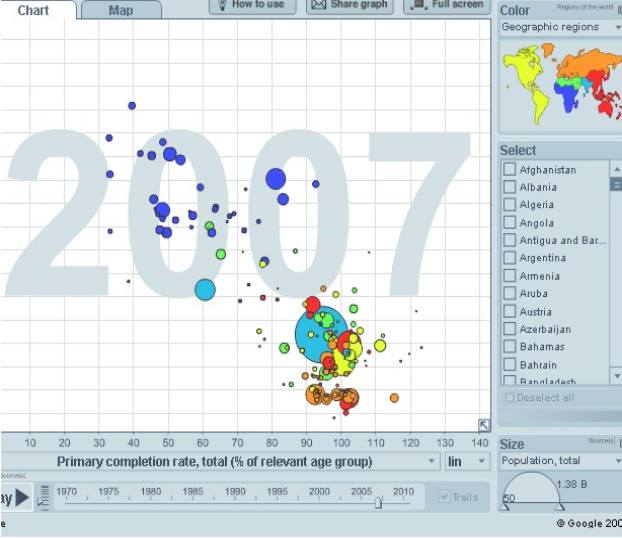

In [3]:
Image(filename='fert_taxa.png')


## PERGUNTA: Como o a taxa de conclusão do ensino primário e a renda por pessoa impactam na taxa de fertilidade?


#### Imports

In [4]:
%matplotlib inline
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
from matplotlib.ticker import LinearLocator

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Matheus\Downloads


In [5]:
data = pd.read_excel('excel p3.xlsx',index_col=0)
data_2 = pd.read_excel('data_2.xlsx',index_col=0)

dados = data.join(data_2, how='inner')
dados.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data_2.xlsx'

In [ ]:
dadosinf = pd.read_excel('excel p3.xlsx',index_col=0)

In [ ]:
dadossup = pd.read_excel('excel p3.xlsx',index_col=0)

In [ ]:
dados.shape

In [ ]:
#Retirar NaN
dados=dados[~np.isnan(dados.Filhos)]
dados=dados[~np.isnan(dados.Income)]
dados=dados[~np.isnan(dados.IDH)]
dados=dados[~np.isnan(dados.Taxa)]
dados.shape

In [ ]:
dados['LogIncome'] = np.log(dados['Income'])

### Média e desvio padrão da Taxa de Fertilidade

In [ ]:
#Média e Desvio Padrão de filhos
print('Média:',dados.Filhos.mean())
print('Desvio Padrão:',dados.Filhos.var()**1/2)

### Média e desvio padrão da Renda por pessoa

In [ ]:
#Média e Desvio Padrão Renda
print('Média:',dados.Income.mean())
print('Desvio Padrão:',dados.Income.var()**1/2)

### Média e desvio padrão da Taxa de conclusão do ensino primário

In [ ]:
#Média e Desvio Padrão Taxa
print('Média:',dados.Taxa.mean())
print('Desvio Padrão:',dados.Taxa.var()**1/2)

### Comparando as variáveis explicativas com a variável resposta

In [ ]:
## TAXA DE FERTILIDADE x Renda
plt.scatter(dados.LogIncome, dados.Filhos, alpha=0.7, color = 'black')  # Plot the raw data
plt.title('Taxa de fertilidade X Renda')
plt.xlabel('Log Renda')
plt.ylabel('Taxa de Fertilidade')
plt.show()

## TAXA DE FERTILIDADE x TAXA DE CONCLUSÃO DO ENSINO PRIMÁRIO
plt.scatter(dados.Taxa, dados.Filhos, alpha=0.7, color='black')  # Plot the raw data
plt.title('Taxa de fertilidade X Taxa de conclusão do ensino primário')
plt.xlabel("Taxa de conclusão do ensino primário")
plt.ylabel("Taxa de fertilidade")



### Análise das correlações entre as variáveis

In [ ]:
dados.corr(method='pearson')


Nota-se valores altos de correlação entre as variáveis escolhidas, sabendo que quando mais próximo de 1 (valor máximo de correlação) maior a associação entre as duas variáveis analisadas.

### Gráfico 3D das variáveis

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
X = dados[['Taxa', 'LogIncome']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.LogIncome.min(), X.LogIncome.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Taxa, X[resid >= 0].LogIncome, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Taxa, X[resid < 0].LogIncome, y[resid < 0], color='black', alpha=1.0)

ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('Log Renda por pessoa')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')

### Regressão Linear Múltipla

In [ ]:
#Regressão Linear Multipla 

y=dados.Filhos
X=dados.iloc[:,(2,3)]
X=sm1.add_constant(X)  
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

O coeficiente de determinação R² é a variação explicada pelo modelo dividida pela variação total real, ou seja, 64.1% das variações reais podem ser explicadas pelo modelo proposto. Percebemos também que a relação da Taxa de Fertilidade com ambas variáveis explicativas é negativa, uma vez que seus coeficientes mostrados acima (-1.168e-5 e -0,0610) são menores que zero. Ou seja, quanto maior a Taxa de fertilidade, menor será o IDH e a Taxa de conclusão do ensino primário.

### Subgrupos

#### Divisão: Países com IDH elevado (maior que 0.700 ), Países com baixo IDH (menor que 0.555) e Países com IDH médio(entre 0.555 e 0.777)

 Escolhemos trabalhar com tais subgrupos pois achamos importante ver as relações da taxa de natalidade, da taxa de conclusão do ensino primário, e da renda por pessoa em relação aos diferentes grupos de IDH definidos acima

In [ ]:
div_1 = 0.700
div_2 = 0.555

In [ ]:
data = pd.read_excel('excel p3.xlsx',index_col=0)
data_2 = pd.read_excel('data_2.xlsx',index_col=0)
group = data.join(data_2, how='inner')

In [ ]:
#Retirar NaN
group=group[~np.isnan(group.Filhos)]
group=group[~np.isnan(group.Income)]
group=group[~np.isnan(group.IDH)]
group=group[~np.isnan(group.Taxa)]
group['LogIncome'] = np.log(group['Income'])


## Criando DafaFrame com IDH<=0.555 -  índice baixo 

In [ ]:
group_1 = pd.DataFrame()
group_1['Filhos']=group[group.IDH <= div_2].Filhos
group_1['Taxa']=group[group.IDH <= div_2].Taxa
group_1['LogIncome']=group[group.IDH <= div_2].LogIncome



In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Taxa', 'LogIncome']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.LogIncome.min(), X.LogIncome.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(group_1.Taxa, group_1.LogIncome, group_1.Filhos, color='black', alpha=1.0, facecolor='blue')
#ax.scatter(group_2.Taxa, group_2.IDH, group_2.Filhos, color='black', alpha=1.0, facecolor ='red')

ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('Log Renda por pessoa')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')

Percebe-se que os países com IDH baixo (<=0.555) possume uma maior taxa de fertilidade e uma menor taxa de conclusão do ensino primário em relação ao modelo global

## Criando DafaFrame com IDH>=0.700 - índice elevado e muito elevado

In [ ]:
group_2 = pd.DataFrame()
group_2['Filhos']=group[group.IDH >= div_1].Filhos
group_2['Taxa']=group[group.IDH >= div_1].Taxa
group_2['LogIncome']=group[group.IDH >= div_1].LogIncome


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Taxa', 'LogIncome']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.LogIncome.min(), X.LogIncome.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
#ax.scatter(group_1.Taxa, group_1.IDH, group_1.Filhos, color='black', alpha=1.0, facecolor='blue')
ax.scatter(group_2.Taxa, group_2.LogIncome, group_2.Filhos, color='black', alpha=1.0, facecolor ='red')

ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('Log Renda por pessoa')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')

Percebe-se que os países com IDH elevado (>=0.7) possume uma menor taxa de fertilidade e uma maior taxa de conclusão do ensino primário em relação ao modelo global.

## Criando DafaFrame com 0.700>IDH>0.555 - índice médio

In [ ]:
group_3 = pd.DataFrame()
group_3['Filhos']=group[(group.IDH < div_1) & (group.IDH > div_2)].Filhos
group_3['Taxa']=group[(group.IDH < div_1) & (group.IDH > div_2)].Taxa
group_3['LogIncome']=group[(group.IDH < div_1) & (group.IDH > div_2)].LogIncome


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['Taxa', 'LogIncome']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.LogIncome.min(), X.LogIncome.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(group_3.Taxa, group_3.LogIncome, group_3.Filhos, color='black', alpha=1.0, facecolor='green')
ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('Log Renda por pessoa')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')

Os países com IDH médio (entre 0.7 e 0.555) se encaixam melhor com o modelo global em relação aos outros subgrupos.

### Gráfico 3D com os subgrupos

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
X = dados[['Taxa', 'LogIncome']]
y = dados['Filhos']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.Taxa.min(), X.Taxa.max(), 100), 
                       np.linspace(X.LogIncome.min(), X.LogIncome.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(group_1.Taxa, group_1.LogIncome, group_1.Filhos, color='black', alpha=1.0, facecolor='blue')
ax.scatter(group_2.Taxa, group_2.LogIncome, group_2.Filhos, color='black', alpha=1.0, facecolor ='red')
ax.scatter(group_3.Taxa, group_3.LogIncome, group_3.Filhos, color='black', alpha=1.0, facecolor='green')

red_patch = mpatches.Patch(color='red', label='IDH alto')
green_patch = mpatches.Patch(color='green', label='IDH médio')
blue_patch = mpatches.Patch(color='blue', label='IDH baixo')

plt.legend(handles=[green_patch,red_patch,blue_patch])
ax.set_zlabel('Taxa de Fertilidade')
ax.set_ylabel('Log Renda por pessoa')
ax.set_xlabel('Taxa de Conclusão do Ensino Primário')

## Conclusão

Após as análises obtidas no desenvolver do projeto, pudemos concluir algumas coisas: 
Depois de juntarmos os dados, decidimos agrupar as informações de uma maneira diferente: dividindo os países de acordo com seu IDH. Dividimos os países em 3 categorias: IDH baixo,  IDH médio e IDH elevado e muito elevado. Tudo isso com o intuito de compará-los com o modelo global.
<p>Após as decisões de quais grupos que seriam dividos, a seguinte pergunta surgiu: os dados reorganizados em seus novos grupos (subgrupos) irão se comportar de acordo com o modelo global?
Depois de nossas análises, chegamos a uma resposta inesperada: não!</p>
Por exemplo, se formos estimar a taxa de natalidade a partir do modelo global para países do subgrupo de IDH baixo, iriamos chegar a valores subestimados em relação à realidade; no que se trata da taxa de conclusão do ensino primário, iríamos chegar à valores superestimados em relação à realidade. Por outro lado, caso fossemos estimar os valores das variáveis de países com IDH alto - tendo como base o modelo global - iríamos chegar a valores muito diferentes dos reais, uma vez que a taxa de natalidade está superestimada, a taxa de conclusão do ensino primário subestimada e a renda por pessoa subestimada.
<p>Deste modo, concluímos que o modelo inicial, apesar de ser global, ele não cumpre a sua função ao representar valores das variáveis de subgrupos como os do IDH visto acima, por isso não pode ser considerado completo por si só.</p>